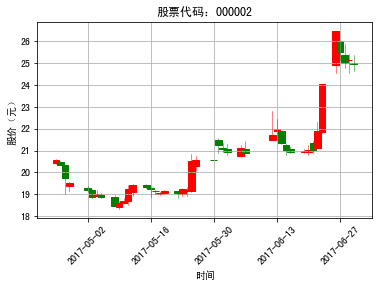

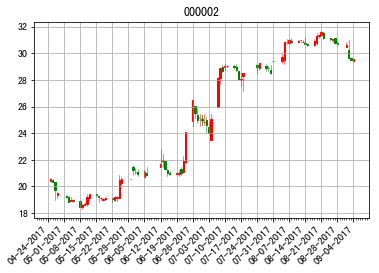

In [9]:
#coding:utf-8

# https://blog.csdn.net/luoganttcc/article/details/73863643

import matplotlib.pyplot as plt
import numpy as np


from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc
#import matplotlib
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import datetime

# from matplotlib.font_manager import _rebuild
# _rebuild()

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family']='sans-serif'

df=ts.get_hist_data('000002',start='2017-04-25',end='2017-06-30')

fig = plt.gcf()
hist_data=df 
# 创建子图
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()
plt.xticks(rotation=45)
plt.yticks()
plt.title(u'股票代码：000002')
plt.xlabel(u'时间')
plt.ylabel(u'股价（元）')
#candlestick_ohlc(ax,data_list,width=1.5,colorup='r',colordown='g')
plt.grid()

hist_data=df .sort_index()
# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,close,low = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)



mondays = WeekdayLocator(MONDAY)            # 主要刻度
alldays = DayLocator()                      # 次要刻度
#weekFormatter = DateFormatter('%b %d')     # 如：Jan 12
mondayFormatter = DateFormatter('%m-%d-%Y') # 如：2-29-2015
dayFormatter = DateFormatter('%d')          # 如：12
candlestick_ohlc(ax,data_list,width=1.5,colorup='r',colordown='g')  

mid=np.array(data_list)

mm=np.ones((len(mid),5))

mm=np.ones((len(mid),5))
av=(mid[len(mid)-1,1]+mid[len(mid)-1,2]+mid[len(mid)-1,3]+mid[len(mid)-1,4])*0.25


for x in range(len(mid)):
    mm[x,0]=2*mid[len(mid)-1,0]-mid[x,0]
    mm[x,1]=2*av-mid[x,4]
    mm[x,2]=2*av-mid[x,3]
    mm[x,3]=2*av-mid[x,2]
    mm[x,4]=2*av-mid[x,1]

merge=np.concatenate((mm,mid))


if len(merge) == 0:
    raise SystemExit

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(mondayFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)

#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, merge, width=0.6, colorup='r', colordown='g')

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax.grid(True)
plt.title('000002')
plt.show()  